### Modules

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib.dates as mdates
%matplotlib inline

#adjust font size of graph
plt.rcParams.update({'font.size': 25})

### Predefine parameters

In [3]:
trendFile = "trends1.csv"
predictionFile = "predictions.csv"

### Read File

In [4]:
dfTrend = pd.read_csv(trendFile)
dfPrediction = pd.read_csv(predictionFile)

#### 1.Assess the three trends in trends1.csv, which is performing best. Elaborate on how you defined "best performance".

In [5]:
dfTrend.head()

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04


In [28]:
#change str to datetime
dfTrend['datetime'] = pd.to_datetime(dfTrend['date'])

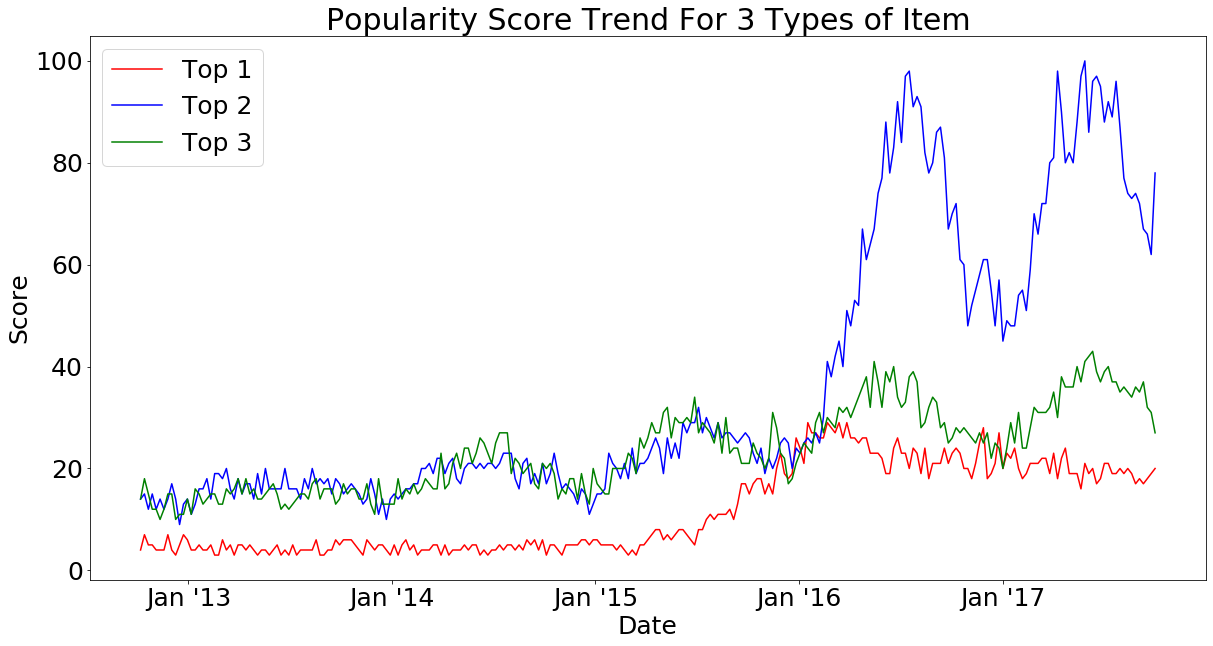

In [129]:
fig, ax = plt.subplots(figsize=(20, 10))
#plot line graph
ax.plot_date(dfTrend['datetime'], dfTrend['top 1'], fmt = 'b-', color = 'r', label = "Top 1")
ax.plot_date(dfTrend['datetime'], dfTrend['top 2'], fmt = 'b-', color = 'b', label = "Top 2")
ax.plot_date(dfTrend['datetime'], dfTrend['top 3'], fmt = 'b-', color = 'g', label = "Top 3")
#set label
ax.set(xlabel = "Date", 
       ylabel = "Score",
       title = "Popularity Score Trend For 3 Types of Item")

#set x axis
months = MonthLocator(bymonth = 1)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#set legend
ax.legend()

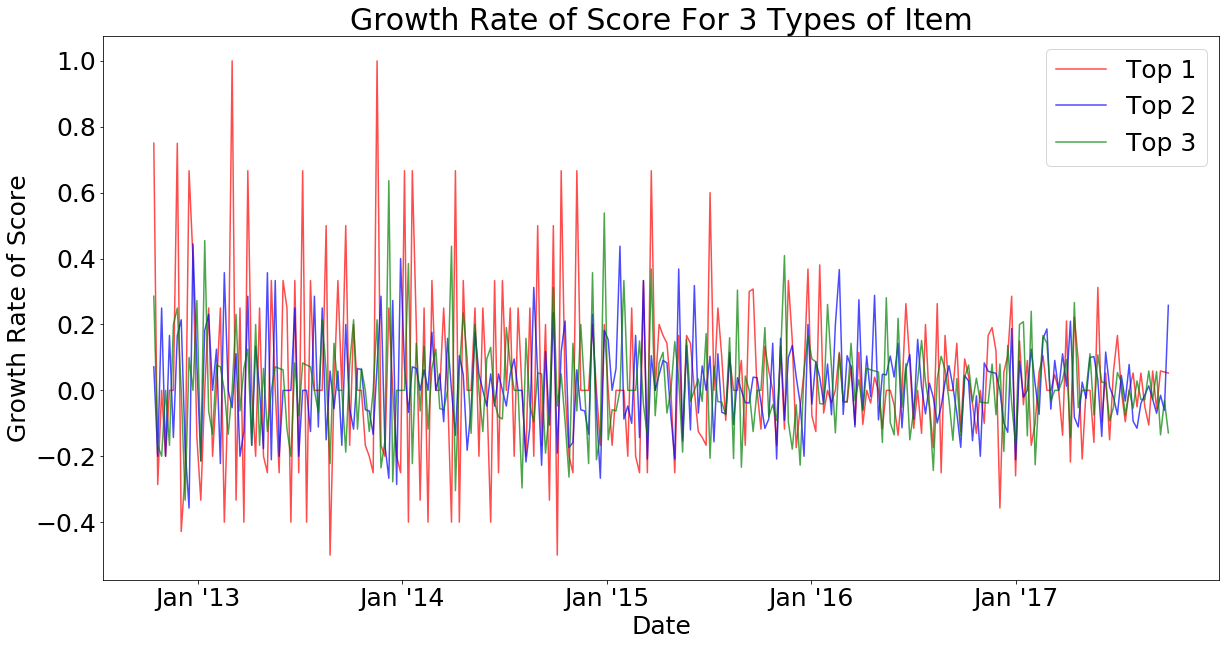

In [128]:
#calculate growth rate
dfTrend['Top1Growth'] = dfTrend['top 1'].pct_change()
dfTrend['Top2Growth'] = dfTrend['top 2'].pct_change()
dfTrend['Top3Growth'] = dfTrend['top 3'].pct_change()

fig, ax = plt.subplots(figsize=(20, 10))
#plot line graph
ax.plot_date(dfTrend['datetime'], dfTrend['Top1Growth'], fmt = 'b-', 
             color = 'r', label = "Top 1", alpha=0.7)
ax.plot_date(dfTrend['datetime'], dfTrend['Top2Growth'], fmt = 'b-', 
             color = 'b', label = "Top 2", alpha=0.7)
ax.plot_date(dfTrend['datetime'], dfTrend['Top3Growth'], fmt = 'b-', 
             color = 'g', label = "Top 3", alpha=0.7)
#set label
ax.set(xlabel = "Date", 
       ylabel = "Growth Rate of Score",
       title = "Growth Rate of Score For 3 Types of Item")

#set x axis
months = MonthLocator(bymonth = 1)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#set legend
ax.legend()

In [53]:
#average of growth rate
print("Average of growth rate - Top 1: {:.2f}".format(dfTrend['Top1Growth'].mean()))
print("Average of growth rate - Top 2: {:.2f}".format(dfTrend['Top2Growth'].mean()))
print("Average of growth rate - Top 3: {:.2f}".format(dfTrend['Top3Growth'].mean()))

Average of growth rate - Top 1: 0.04
Average of growth rate - Top 2: 0.02
Average of growth rate - Top 3: 0.01


Top 1 has the highest average of growth rate - 0.04 compared to others (0.02 and 0.01). Hence, Top 1 performs the best. 
Average of growth rate is used as it measures consistency of growth rate over time. 

#### 2.	Quantify the performance over the last year - to establish what proportion of demand has changed.

In [63]:
dfTrendLastYear = dfTrend[dfTrend['datetime']>pd.to_datetime("2017")].copy()

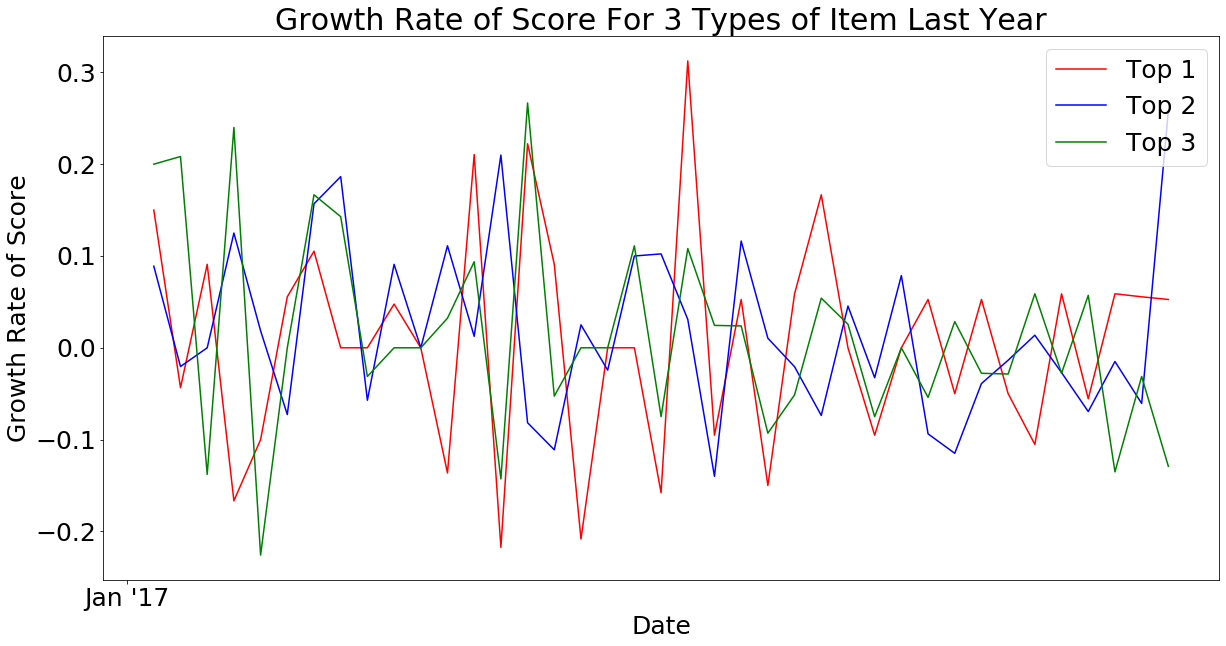

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))
#plot line graph
ax.plot_date(dfTrendLastYear['datetime'], dfTrendLastYear['Top1Growth'], fmt = 'b-', color = 'r', label = "Top 1")
ax.plot_date(dfTrendLastYear['datetime'], dfTrendLastYear['Top2Growth'], fmt = 'b-', color = 'b', label = "Top 2")
ax.plot_date(dfTrendLastYear['datetime'], dfTrendLastYear['Top3Growth'], fmt = 'b-', color = 'g', label = "Top 3")
#set label
ax.set(xlabel = "Date", 
       ylabel = "Growth Rate of Score",
       title = "Growth Rate of Score For 3 Types of Item Last Year")

#set x axis
months = MonthLocator(bymonth = 1)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#set legend
ax.legend()

In [66]:
#average of growth rate for last year
print("Average of growth rate - Top 1: {:.2f}".format(dfTrendLastYear['Top1Growth'].mean()))
print("Average of growth rate - Top 2: {:.2f}".format(dfTrendLastYear['Top2Growth'].mean()))
print("Average of growth rate - Top 3: {:.2f}".format(dfTrendLastYear['Top3Growth'].mean()))

Average of growth rate - Top 1: 0.01
Average of growth rate - Top 2: 0.02
Average of growth rate - Top 3: 0.01


Top 2 has a better growth rate of score in average for last year. Hence top 2 has a relatively better demand

#### 3.Look at the predictions.csv file - there are three fits for each trend, comment on which you find to be best.

In [73]:
from sklearn.metrics import mean_absolute_error
import re
import numpy as np

In [81]:
dfPrediction['datetime'] = pd.to_datetime(dfPrediction['date'])

#remove forecast
dfPrediction2 = dfPrediction[dfPrediction['datetime']<=pd.to_datetime("2017-10-01")].copy()

In [164]:
resultDict = {}
for pattern in ['fit ', 'fit2', 'fit3']:
    tempDict = {}
    fitColList = [i for i in dfPrediction2.columns if re.search("%s"%pattern, i)]
    for col in fitColList:
        tempDict[col] = mean_absolute_error(dfTrend[' '.join(col.split(' ')[1:3])].values,dfPrediction2[col].values)
#         print(tempDict)
    resultDict[pattern] = np.mean(list(tempDict.values()))

In [115]:
for i,j in resultDict.items():
    print("Average of mean absolute error - {}: {:.2f}".format(i, j))

Average of mean absolute error - fit : 3.57
Average of mean absolute error - fit2: 2.25
Average of mean absolute error - fit3: 2.04


fit3 is the best as it has the lowest average of mean absolute error - 2.04 compared to others (3.57 and 2.25)

#### 4.	Quantify these predictions into an assessment of how you would expect the demand to change over the next 3, 6, 12 months.

In [117]:
#just forecast
dfForecast = dfPrediction[dfPrediction['datetime']>pd.to_datetime("2017-10-01")].copy()

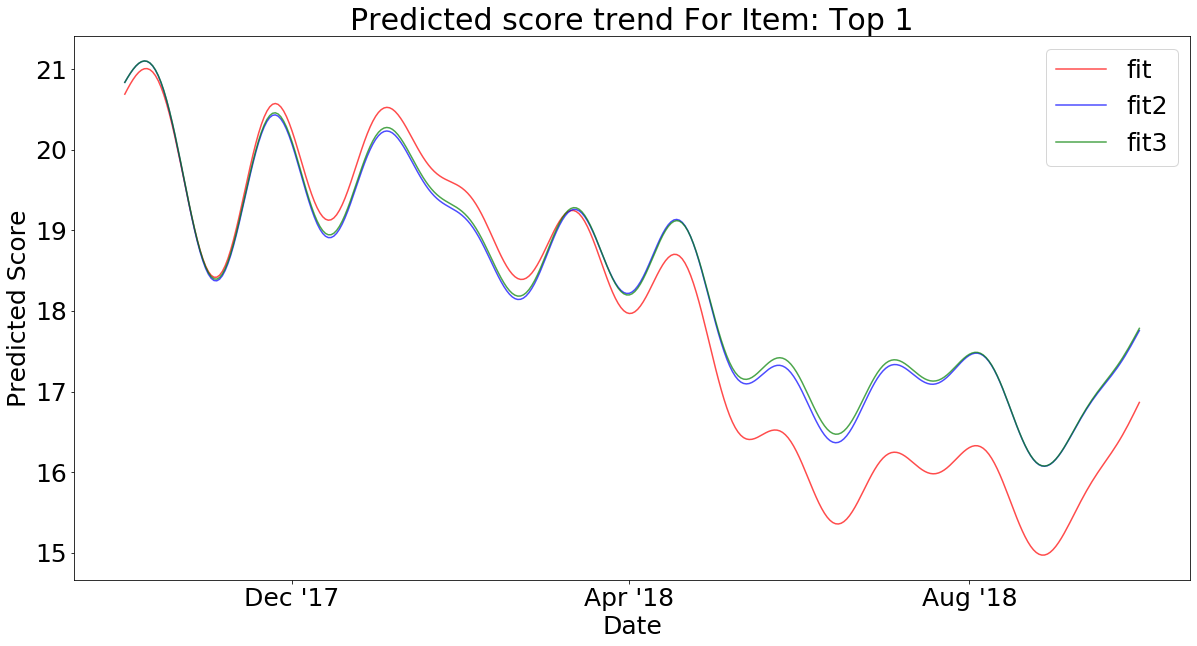

In [125]:
#calculate growth rate
dfForecast['Fit_Top1Growth'] = dfForecast['fit top 1'].pct_change()
dfForecast['Fit2_Top1Growth'] = dfForecast['fit2 top 1'].pct_change()
dfForecast['Fit3_Top1Growth'] = dfForecast['fit3 top 1'].pct_change()

fig, ax = plt.subplots(figsize=(20, 10))
#plot line graph
ax.plot_date(dfForecast['datetime'], dfForecast['fit top 1'], fmt = 'b-', 
             color = 'r', label = "fit", alpha=0.7)
ax.plot_date(dfForecast['datetime'], dfForecast['fit2 top 1'], fmt = 'b-', 
             color = 'b', label = "fit2", alpha=0.7)
ax.plot_date(dfForecast['datetime'], dfForecast['fit3 top 1'], fmt = 'b-', 
             color = 'g', label = "fit3", alpha=0.7)
#set label
ax.set(xlabel = "Date", 
       ylabel = "Predicted Score",
       title = "Predicted score trend For Item: Top 1")

#set x axis
months = MonthLocator(interval = 4)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#set legend
ax.legend()

Top 1: In 3 months(from Oct17 till Dec17), it is an low decreasing trend (slight reduction in demand), after 6 months (around Apr 18),
The downward trend is more obvious(even lesser demand). Fortunately, at the end of 12 months, it reverberates and an increasing
trend is observed (increase in demand)

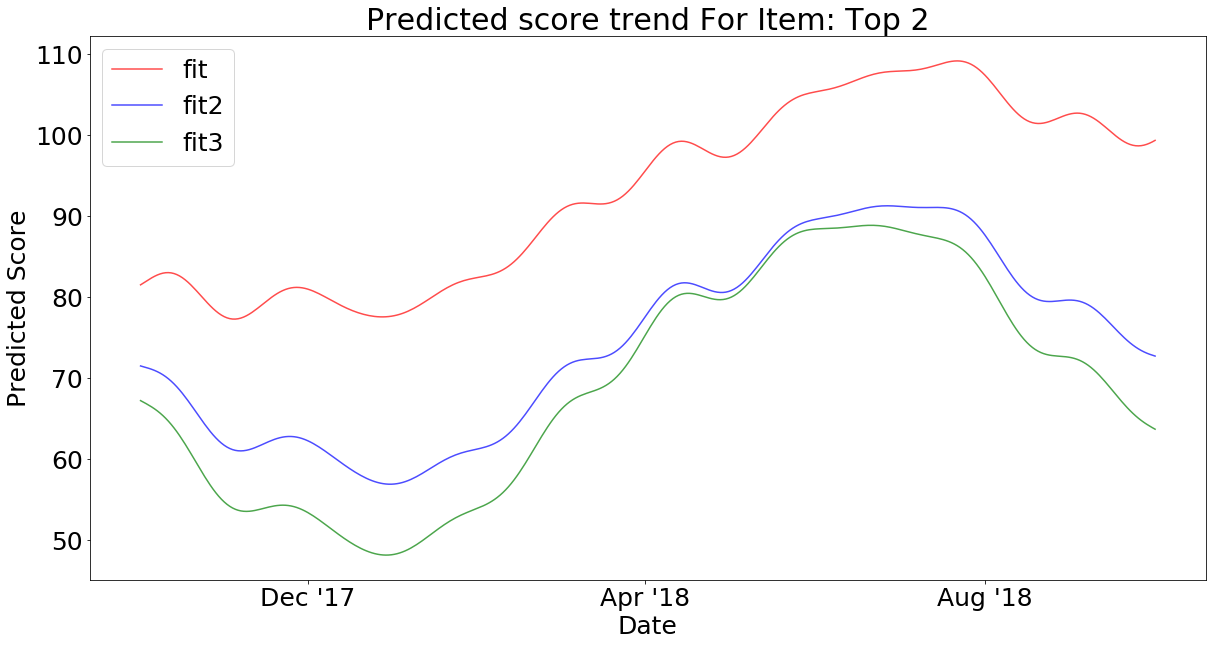

In [127]:
fig, ax = plt.subplots(figsize=(20, 10))
#plot line graph
ax.plot_date(dfForecast['datetime'], dfForecast['fit top 2'], fmt = 'b-', 
             color = 'r', label = "fit", alpha=0.7)
ax.plot_date(dfForecast['datetime'], dfForecast['fit2 top 2'], fmt = 'b-', 
             color = 'b', label = "fit2", alpha=0.7)
ax.plot_date(dfForecast['datetime'], dfForecast['fit3 top 2'], fmt = 'b-', 
             color = 'g', label = "fit3", alpha=0.7)
#set label
ax.set(xlabel = "Date", 
       ylabel = "Predicted Score",
       title = "Predicted score trend For Item: Top 2")

#set x axis
months = MonthLocator(interval = 4)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#set legend
ax.legend()

Top 2: In 3 months(from Oct17 till Dec17), it is an low decreasing trend (slight decrease in demand), after 6 months (around Apr 18),
there is an inceaseing trend (an increase in demand). After 12 months, the trend starts to go downward(a decrease in demand)

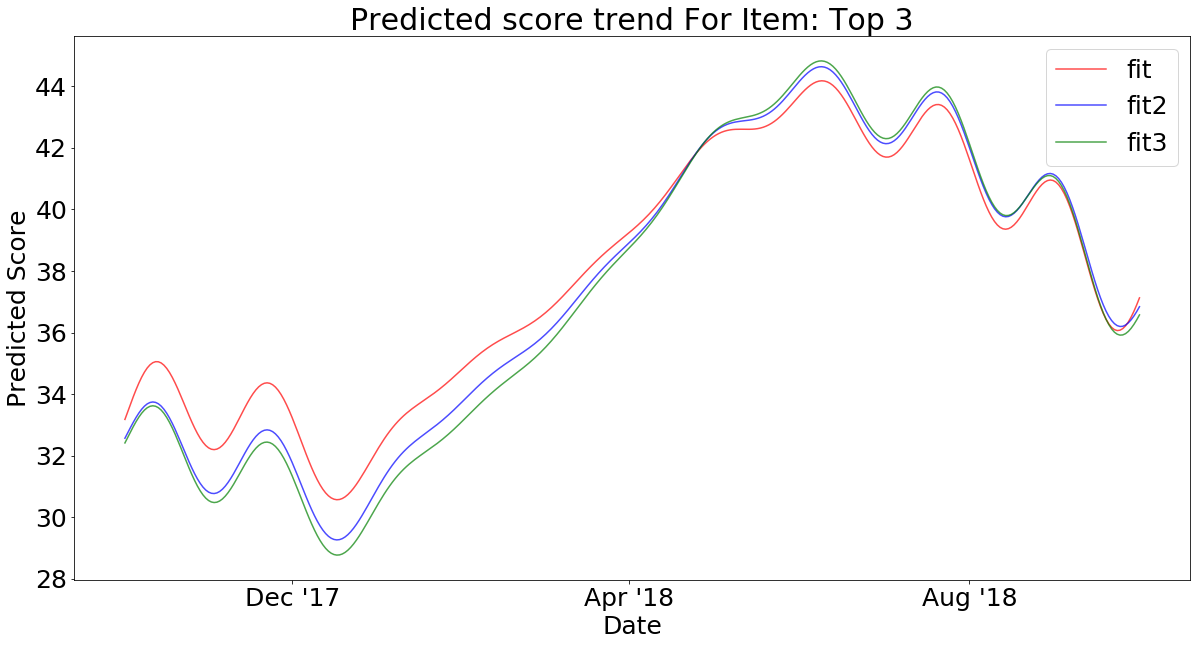

In [130]:
fig, ax = plt.subplots(figsize=(20, 10))
#plot line graph
ax.plot_date(dfForecast['datetime'], dfForecast['fit top 3'], fmt = 'b-', 
             color = 'r', label = "fit", alpha=0.7)
ax.plot_date(dfForecast['datetime'], dfForecast['fit2 top 3'], fmt = 'b-', 
             color = 'b', label = "fit2", alpha=0.7)
ax.plot_date(dfForecast['datetime'], dfForecast['fit3 top 3'], fmt = 'b-', 
             color = 'g', label = "fit3", alpha=0.7)
#set label
ax.set(xlabel = "Date", 
       ylabel = "Predicted Score",
       title = "Predicted score trend For Item: Top 3")

#set x axis
months = MonthLocator(interval = 4)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#set legend
ax.legend()

Top 3: In 3 months(from Oct17 till Dec17), it is an low decreasing trend (slight decrease in demand), after 6 months (around Apr 18),
there is a strong inceaseing trend (great increase in demand). After 12 months, the trend starts to go downward(a decrease in demand)

#### 5.	Please create your own predictions based of the three types of tops.

In [156]:
import calendar

#create time/date features
dfTrend['Year'] = dfTrend['datetime'].dt.year
dfTrend['Month'] = dfTrend['datetime'].dt.month
dfTrend['Day'] = dfTrend['datetime'].dt.day
dfTrend['DayOfWeek'] = dfTrend['datetime'].map(lambda x:x.weekday())
#first day of month
dfTrend['StartOfMonth'] = dfTrend['datetime'].map(lambda x:x == x.replace(day = 1))
#end day of month
dfTrend['EndOfMonth'] = dfTrend['datetime'].map(lambda x:x.day == calendar.monthrange(x.year, x.month)[1])
dfTrend['Quarter'] = dfTrend['datetime'].dt.quarter

In [198]:
#use one last year as testing, date before as training
dfTraining = dfTrend[dfTrend['datetime']<pd.to_datetime("2016-10-01")].copy()
dfTesting = dfTrend[dfTrend['datetime']>=pd.to_datetime("2016-10-01")].copy()

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

colList = ['Year', 'Month', 'Day', 'DayOfWeek',
          'StartOfMonth', 'EndOfMonth', 'Quarter']
LRresultDict2 = {}
LRresultDict_Training = {}

for yCol in ['top 1', 'top 2', 'top 3']:
    x_train = dfTraining[colList].values
    x_test = dfTesting[colList].values
    y_train = dfTraining[yCol].values
    y_test = dfTesting[yCol].values
    #implement linear regression for different types: 3 models for 3 types of item
    model = LinearRegression()
    model.fit(x_train,y_train)
    trainingPrediction = model.predict(x_train)
    prediction = model.predict(x_test)
    trainingResult = mean_absolute_error(y_train, trainingPrediction)
    result = mean_absolute_error(y_test, prediction)
    dfTesting[yCol + '_LR'] = result
    resultDict2[yCol] = result
    resultDict_Training[yCol + '_Training'] = trainingResult

#### 6.	Briefly explain your choice of model, and how it performs better or worse than the provided predictions.

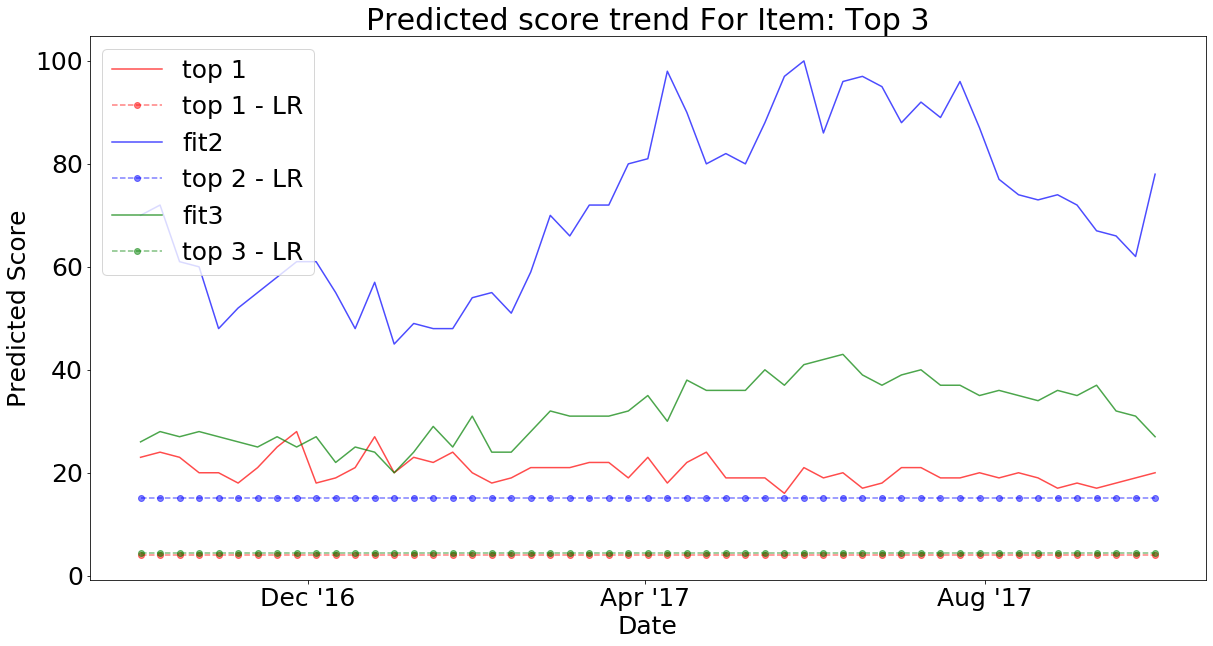

In [192]:
fig, ax = plt.subplots(figsize=(20, 10))
#plot line graph
ax.plot_date(dfTesting['datetime'], dfTesting['top 1'], fmt = 'b-', 
             color = 'r', label = "top 1", alpha=0.7)
ax.plot_date(dfTesting['datetime'], dfTesting['top 1_LR'], linestyle = '--', 
             color = 'r', label = "top 1 - LR", alpha=0.5)
ax.plot_date(dfTesting['datetime'], dfTesting['top 2'], fmt = 'b-', 
             color = 'b', label = "fit2", alpha=0.7)
ax.plot_date(dfTesting['datetime'], dfTesting['top 2_LR'], linestyle = '--', 
             color = 'b', label = "top 2 - LR", alpha=0.5)
ax.plot_date(dfTesting['datetime'], dfTesting['top 3'], fmt = 'b-', 
             color = 'g', label = "fit3", alpha=0.7)
ax.plot_date(dfTesting['datetime'], dfTesting['top 3_LR'], linestyle = '--', 
             color = 'g', label = "top 3 - LR", alpha=0.5)
#set label
ax.set(xlabel = "Date", 
       ylabel = "Predicted Score",
       title = "Predicted score trend For Item: Top 3")

#set x axis
months = MonthLocator(interval = 4)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#set legend
ax.legend()

In [200]:
for i,j in resultDict.items():
    print("Average of mean absolute error - {}: {:.2f}".format(i, j))
print("Average of mean absolute error - train: {:.2f}".format(np.mean(list(LRresultDict_Training.values()))))    
print("Average of mean absolute error - test: {:.2f}".format(np.mean(list(LRresultDict2.values()))))

Average of mean absolute error - fit : 3.57
Average of mean absolute error - fit2: 2.25
Average of mean absolute error - fit3: 2.04
Average of mean absolute error - train: 6.05
Average of mean absolute error - test: 7.85


Linear regression is preferred as it is a simple model and easy to interpret. It is useful to serve as a benchmark.
However, it overfits to certain engineered time features. An increase in average of mae shows that as well.my choice of model performs worse than provided predictions, its average of mean absolute error (7.85) is larger than the others